In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statistics as stat
import json

In [ ]:
from google.colab import drive

drive.mount("/content/gdrive")  
!pwd  # show current path 

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/My Drive/Reto2/datasets


In [ ]:
%cd "/content/gdrive/MyDrive/Reto2/datasets"

/content/gdrive/MyDrive/Reto2/datasets


In [ ]:
!ls

antenna_geolocation.csv   phone_id_routes_clean.json
antennas_geolocation.csv  phone_id_routes.json
bts_comuna.csv		  phones_initial_dataset.names
dict_coord_bts.pickle	  routes_ready.csv
json			  trips.csv
out.csv


In [ ]:
dataset = pd.read_csv('routes_ready.csv')

In [ ]:
with open('json/latlon_comuna_mapping.json','r') as f:
  dic = json.load(f)


In [ ]:
dataset

,phone id,start,stop,lat,lon,dwell time,jump time,jump distance,jump velocity
0,00000000e3fc09803d408609f55cbf905120d3a41db564...,555,555,-33.3844,-70.5534,0.000000,NaN,NaN,NaN
1,00000000e3fc09803d408609f55cbf905120d3a41db564...,997,1116,-33.3806,-70.5419,1.983333,7.366667,1.148335,9.352953
2,00000000e3fc09803d408609f55cbf905120d3a41db564...,2355,2355,-33.3994,-70.5699,0.000000,20.650000,3.335831,9.692487
3,00000000e3fc09803d408609f55cbf905120d3a41db564...,2916,2916,-33.3972,-70.5499,0.000000,9.350000,1.872700,12.017325
4,00000000e3fc09803d408609f55cbf905120d3a41db564...,3488,3488,-33.3806,-70.5419,0.000000,9.533333,1.989667,12.522380
...,...,...,...,...,...,...,...,...,...
9777282,ffffd2e21a16bc902e5e242aef7d68cbbb824a82b7efa8...,2801,84522,-33.3851,-70.5700,1362.016667,NaN,NaN,NaN
9777283,ffffdecede452ab62eeeff9cfc2a57c8a8c0396c671a06...,231,81361,-33.6142,-70.5975,1352.166667,NaN,NaN,NaN
9777284,ffffea064367ea293c32db026f6dee34efa6c464375ac9...,869,5687,-33.4163,-70.5587,80.300000,NaN,NaN,NaN
9777285,ffffea064367ea293c32db026f6dee34efa6c464375ac9...,6987,81140,-33.4034,-70.5584,1235.883333,21.666667,1.434685,3.972973


In [ ]:
dataset['lat'] = dataset['lat'].astype('string')
dataset['lon'] = dataset['lon'].astype('string')

In [ ]:
#users['full_name'] = users.first_name.str.cat(users.last_name, sep=' ')
dataset['id_lat_lon'] = dataset.lat.str.cat(dataset.lon, sep=',')
dataset

,phone id,start,stop,lat,lon,dwell time,jump time,jump distance,jump velocity,id_lat_lon
0,00000000e3fc09803d408609f55cbf905120d3a41db564...,555,555,-33.3844,-70.5534,0.000000,NaN,NaN,NaN,"-33.3844,-70.5534"
1,00000000e3fc09803d408609f55cbf905120d3a41db564...,997,1116,-33.3806,-70.5419,1.983333,7.366667,1.148335,9.352953,"-33.3806,-70.5419"
2,00000000e3fc09803d408609f55cbf905120d3a41db564...,2355,2355,-33.3994,-70.5699,0.000000,20.650000,3.335831,9.692487,"-33.3994,-70.5699"
3,00000000e3fc09803d408609f55cbf905120d3a41db564...,2916,2916,-33.3972,-70.5499,0.000000,9.350000,1.872700,12.017325,"-33.3972,-70.5499"
4,00000000e3fc09803d408609f55cbf905120d3a41db564...,3488,3488,-33.3806,-70.5419,0.000000,9.533333,1.989667,12.522380,"-33.3806,-70.5419"
...,...,...,...,...,...,...,...,...,...,...
9777282,ffffd2e21a16bc902e5e242aef7d68cbbb824a82b7efa8...,2801,84522,-33.3851,-70.57,1362.016667,NaN,NaN,NaN,"-33.3851,-70.57"
9777283,ffffdecede452ab62eeeff9cfc2a57c8a8c0396c671a06...,231,81361,-33.6142,-70.5975,1352.166667,NaN,NaN,NaN,"-33.6142,-70.5975"
9777284,ffffea064367ea293c32db026f6dee34efa6c464375ac9...,869,5687,-33.4163,-70.5587,80.300000,NaN,NaN,NaN,"-33.4163,-70.5587"
9777285,ffffea064367ea293c32db026f6dee34efa6c464375ac9...,6987,81140,-33.4034,-70.5584,1235.883333,21.666667,1.434685,3.972973,"-33.4034,-70.5584"


In [ ]:
df = pd.DataFrame(dic, index = [0])
print(df.shape)
df = df.T

(1, 1577)


In [ ]:
comunas = [0]*len(dataset['lat'])
for i in range(len(dataset['lat'])):
  if dataset['id_lat_lon'][i] in dic:
    comunas[i] = dic[dataset['id_lat_lon'][i]]
dataset['comuna'] = comunas
dataset

,phone id,start,stop,lat,lon,dwell time,jump time,jump distance,jump velocity,id_lat_lon,comuna
0,00000000e3fc09803d408609f55cbf905120d3a41db564...,555,555,-33.3844,-70.5534,0.000000,NaN,NaN,NaN,"-33.3844,-70.5534",VITACURA
1,00000000e3fc09803d408609f55cbf905120d3a41db564...,997,1116,-33.3806,-70.5419,1.983333,7.366667,1.148335,9.352953,"-33.3806,-70.5419",VITACURA
2,00000000e3fc09803d408609f55cbf905120d3a41db564...,2355,2355,-33.3994,-70.5699,0.000000,20.650000,3.335831,9.692487,"-33.3994,-70.5699",LAS CONDES
3,00000000e3fc09803d408609f55cbf905120d3a41db564...,2916,2916,-33.3972,-70.5499,0.000000,9.350000,1.872700,12.017325,"-33.3972,-70.5499",LAS CONDES
4,00000000e3fc09803d408609f55cbf905120d3a41db564...,3488,3488,-33.3806,-70.5419,0.000000,9.533333,1.989667,12.522380,"-33.3806,-70.5419",VITACURA
...,...,...,...,...,...,...,...,...,...,...,...
9777282,ffffd2e21a16bc902e5e242aef7d68cbbb824a82b7efa8...,2801,84522,-33.3851,-70.57,1362.016667,NaN,NaN,NaN,"-33.3851,-70.57",VITACURA
9777283,ffffdecede452ab62eeeff9cfc2a57c8a8c0396c671a06...,231,81361,-33.6142,-70.5975,1352.166667,NaN,NaN,NaN,"-33.6142,-70.5975",PUENTE ALTO
9777284,ffffea064367ea293c32db026f6dee34efa6c464375ac9...,869,5687,-33.4163,-70.5587,80.300000,NaN,NaN,NaN,"-33.4163,-70.5587",LAS CONDES
9777285,ffffea064367ea293c32db026f6dee34efa6c464375ac9...,6987,81140,-33.4034,-70.5584,1235.883333,21.666667,1.434685,3.972973,"-33.4034,-70.5584",LAS CONDES


In [ ]:
sample = dataset

In [ ]:
import numpy as np

In [ ]:
sample.head(15)

,phone id,start,stop,lat,lon,dwell time,jump time,jump distance,jump velocity,id_lat_lon,comuna
0,00000000e3fc09803d408609f55cbf905120d3a41db564...,555,555,-33.3844,-70.5534,0.000000,NaN,NaN,NaN,"-33.3844,-70.5534",VITACURA
1,00000000e3fc09803d408609f55cbf905120d3a41db564...,997,1116,-33.3806,-70.5419,1.983333,7.366667,1.148335,9.352953,"-33.3806,-70.5419",VITACURA
2,00000000e3fc09803d408609f55cbf905120d3a41db564...,2355,2355,-33.3994,-70.5699,0.000000,20.650000,3.335831,9.692487,"-33.3994,-70.5699",LAS CONDES
3,00000000e3fc09803d408609f55cbf905120d3a41db564...,2916,2916,-33.3972,-70.5499,0.000000,9.350000,1.872700,12.017325,"-33.3972,-70.5499",LAS CONDES
4,00000000e3fc09803d408609f55cbf905120d3a41db564...,3488,3488,-33.3806,-70.5419,0.000000,9.533333,1.989667,12.522380,"-33.3806,-70.5419",VITACURA
5,00000000e3fc09803d408609f55cbf905120d3a41db564...,4155,4155,-33.3844,-70.5534,0.000000,11.116667,1.148335,6.197909,"-33.3844,-70.5534",VITACURA
6,00000000e3fc09803d408609f55cbf905120d3a41db564...,4716,4716,-33.3883,-70.5955,0.000000,9.350000,3.932775,25.237059,"-33.3883,-70.5955",VITACURA
7,00000000e3fc09803d408609f55cbf905120d3a41db564...,6419,6419,-33.3806,-70.5419,0.000000,28.383333,5.049739,10.674727,"-33.3806,-70.5419",VITACURA
8,00000000e3fc09803d408609f55cbf905120d3a41db564...,6516,10116,-33.3994,-70.5699,60.000000,1.616667,3.335831,123.804040,"-33.3994,-70.5699",LAS CONDES
9,00000000e3fc09803d408609f55cbf905120d3a41db564...,10455,10455,-33.3806,-70.5419,0.000000,5.650000,3.335831,35.424755,"-33.3806,-70.5419",VITACURA


In [ ]:
sample['jump velocity'].describe()

count    8.411153e+06
mean     4.167003e+01
std      4.863719e+02
min      7.020901e-04
25%      2.325411e+00
50%      5.522566e+00
75%      1.655775e+01
max      1.972840e+05
Name: jump velocity, dtype: float64

In [ ]:
if sample['jump distance'][0] == np.nan:
  print('xd')

print(type(sample['jump distance'][0]))

<class 'numpy.float64'>


In [ ]:
df = pd.DataFrame()
origin = []
destination = []
dwell = []
speed = []
phones = []
start_time = [] # its the hour when the conection began, not the duration
end_time = []
lat = []
lon = [] 

aux = []
aux_dwell = []
flag = 1 # 0=end, 1=start

max_dwell = 20
prev_phone = 0
new_phone = 0
############################ destination ############
for i in range(len(sample['start'])-1):
  #if i != 0:
  j =i-1 #max(0,i-1)
  
  if i==0 or (sample['dwell time'][j] > max_dwell) or (sample['phone id'][i] != sample['phone id'][j]): #inicio de viaje  
    origin.append(sample['comuna'][i])
    start_time.append(sample['start'][i])
    flag = 1
    #print(flag,i)

  if flag:
    aux.append(sample['jump velocity'][i])
    aux_dwell.append(sample['dwell time'][i])

  if ((sample['dwell time'][i] > max_dwell) or (sample['phone id'][i]!= sample['phone id'][i+1])):# fin de viaje
    destination.append(sample['comuna'][i])
    end_time.append(sample['stop'][i])
    lat.append(sample['lat'][i])
    lon.append(sample['lon'][i])
    flag = 0
    mean_speed = stat.mean(aux)
    mean_dwell = stat.mean(aux_dwell)
    aux = []
    aux_dwell = []

    if mean_speed < 0.0055:
      speed.append('low_speed')
    elif 0.0055 < mean_speed < 0.08:
      speed.append('medium_speed')
    else:
      speed.append('high_speed')
    
    if mean_dwell < 8:
      dwell.append('low_dwell')
    elif 8 < mean_dwell < 19:
      dwell.append('medium_dwell')
    else:
      dwell.append('high_dwell')
    #print(flag,i)
    
    
      
    
 ############################### hasta aqui ##################################



In [ ]:
dwell = pd.get_dummies(dwell)
speed = pd.get_dummies(speed)

df['origin'] = origin
df['destination'] = destination
df['lon'] = lon
df['lat'] = lat
df['start_time'] = start_time
df['end_time'] = end_time
#df['mean_speed'] = speed
#df['mean_dwell'] = dwell


df

,origin,destination,lon,lat,start_time,end_time
0,VITACURA,LAS CONDES,-70.5699,-33.3994,555,10116
1,VITACURA,VITACURA,-70.5419,-33.3806,10455,34305
2,VITACURA,LAS CONDES,-70.5699,-33.3994,35503,48103
3,VITACURA,LAS CONDES,-70.5699,-33.3994,48680,76746
4,LAS CONDES,VITACURA,-70.5419,-33.3806,77348,83940
...,...,...,...,...,...,...
4196038,PEÑAFLOR,MAIPÚ,-70.795,-33.5545,4904,70588
4196039,VITACURA,VITACURA,-70.57,-33.3851,2801,84522
4196040,PUENTE ALTO,PUENTE ALTO,-70.5975,-33.6142,231,81361
4196041,LAS CONDES,LAS CONDES,-70.5587,-33.4163,869,5687


In [ ]:
df.to_csv('trips2.csv')

In [ ]:
df = df.join(speed)
df = df.join(dwell)
df

,origin,destination,lon,lat,start_time,end_time,high_speed,low_speed,medium_speed,high_dwell,low_dwell,medium_dwell
0,VITACURA,LAS CONDES,-70.5699,-33.3994,555,10116,1,0,0,0,1,0
1,VITACURA,VITACURA,-70.5419,-33.3806,10455,34305,1,0,0,1,0,0
2,VITACURA,LAS CONDES,-70.5699,-33.3994,35503,48103,1,0,0,1,0,0
3,VITACURA,LAS CONDES,-70.5699,-33.3994,48680,76746,1,0,0,1,0,0
4,LAS CONDES,VITACURA,-70.5419,-33.3806,77348,83940,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4196038,PEÑAFLOR,MAIPÚ,-70.795,-33.5545,4904,70588,1,0,0,1,0,0
4196039,VITACURA,VITACURA,-70.57,-33.3851,2801,84522,1,0,0,1,0,0
4196040,PUENTE ALTO,PUENTE ALTO,-70.5975,-33.6142,231,81361,1,0,0,1,0,0
4196041,LAS CONDES,LAS CONDES,-70.5587,-33.4163,869,5687,1,0,0,1,0,0


In [ ]:
len(speed), len(origin), len(destination)

(4196043, 4196043, 4196043)

In [ ]:
origin[:5], destination[:5]

(['VITACURA', 'VITACURA', 'VITACURA', 'VITACURA', 'LAS CONDES'],
 ['LAS CONDES', 'VITACURA', 'LAS CONDES', 'LAS CONDES', 'VITACURA'])

In [ ]:
df

,origin,destination,lon,lat,start_time,end_time,high_speed,low_speed,medium_speed,high_dwell,low_dwell,medium_dwell
0,VITACURA,LAS CONDES,-70.5699,-33.3994,555,10116,1,0,0,0,1,0
1,VITACURA,VITACURA,-70.5419,-33.3806,10455,34305,1,0,0,1,0,0
2,VITACURA,LAS CONDES,-70.5699,-33.3994,35503,48103,1,0,0,1,0,0
3,VITACURA,LAS CONDES,-70.5699,-33.3994,48680,76746,1,0,0,1,0,0
4,LAS CONDES,VITACURA,-70.5419,-33.3806,77348,83940,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4196038,PEÑAFLOR,MAIPÚ,-70.795,-33.5545,4904,70588,1,0,0,1,0,0
4196039,VITACURA,VITACURA,-70.57,-33.3851,2801,84522,1,0,0,1,0,0
4196040,PUENTE ALTO,PUENTE ALTO,-70.5975,-33.6142,231,81361,1,0,0,1,0,0
4196041,LAS CONDES,LAS CONDES,-70.5587,-33.4163,869,5687,1,0,0,1,0,0


In [ ]:
len(destination)

4196043

In [ ]:
df.shape

(4196043, 12)

In [ ]:
sample.columns

Index(['phone id', 'start', 'stop', 'lat', 'lon', 'dwell time', 'jump time',
       'jump distance', 'jump velocity', 'id_lat_lon', 'comuna'],
      dtype='object')

In [ ]:
#n_by_state = df.groupby("state")["last_name"].count()
xd = df.groupby('origin')['destination'].count()
xd.head()

origin
0                   8687
ALHUÉ                755
BUIN               65409
CALERA DE TANGO    28507
CERRILLOS          41641
Name: destination, dtype: int64

In [ ]:
#df[(df['destination'] == 'LO BARNECHEA') & (df['origin']=='HUECHURABA')].value_counts().sum()

In [ ]:
sample['comuna'].unique()

array(['VITACURA', 'LAS CONDES', 'SANTIAGO', 'EL MONTE', 'TALAGANTE',
       'CALERA DE TANGO', 'ESTACIÓN CENTRAL', 'MAIPÚ', 'PROVIDENCIA',
       'SAN MIGUEL', 'RECOLETA', 'RENCA', 'PUENTE ALTO', 'LA GRANJA',
       'PUDAHUEL', 'CURACAVÍ', 'MACUL', 'PEÑAFLOR', 'PADRE HURTADO',
       'ÑUÑOA', 'CERRO NAVIA', 'CONCHALÍ', 'PEÑALOLÉN', 'LA REINA',
       'LO PRADO', 'LA CISTERNA', 'LO BARNECHEA', 'CERRILLOS', 'BUIN',
       'SAN BERNARDO', 'LA PINTANA', 'PAINE', 'QUILICURA', 'LO ESPEJO', 0,
       'SAN JOSÉ DE MAIPO', 'QUINTA NORMAL', 'LA FLORIDA', 'LAMPA',
       'SAN RAMÓN', 'EL BOSQUE', 'SAN JOAQUÍN', 'ISLA DE MAIPO', 'PIRQUE',
       'HUECHURABA', 'MELIPILLA', 'INDEPENDENCIA', 'COLINA',
       'PEDRO AGUIRRE CERDA', 'MARÍA PINTO', 'SAN PEDRO', 'TILTIL',
       'ALHUÉ'], dtype=object)

In [ ]:
#from scipy import rand
#prepare the dummy data

list_comuna = ['VITACURA', 'LAS CONDES', 'SANTIAGO', 'EL MONTE', 'TALAGANTE',
       'CALERA DE TANGO', 'ESTACIÓN CENTRAL', 'MAIPÚ', 'PROVIDENCIA',
       'SAN MIGUEL', 'RECOLETA', 'RENCA', 'PUENTE ALTO', 'LA GRANJA',
       'PUDAHUEL', 'CURACAVÍ', 'MACUL', 'PEÑAFLOR', 'PADRE HURTADO',
       'ÑUÑOA', 'CERRO NAVIA', 'CONCHALÍ', 'PEÑALOLÉN', 'LA REINA',
       'LO PRADO', 'LA CISTERNA', 'LO BARNECHEA', 'CERRILLOS', 'BUIN',
       'SAN BERNARDO', 'LA PINTANA', 'PAINE', 'QUILICURA', 'LO ESPEJO', 0,
       'SAN JOSÉ DE MAIPO', 'QUINTA NORMAL', 'LA FLORIDA', 'LAMPA',
       'SAN RAMÓN', 'EL BOSQUE', 'SAN JOAQUÍN', 'ISLA DE MAIPO', 'PIRQUE',
       'HUECHURABA', 'MELIPILLA', 'INDEPENDENCIA', 'COLINA',
       'PEDRO AGUIRRE CERDA', 'MARÍA PINTO', 'SAN PEDRO', 'TILTIL',
       'ALHUÉ']
comuna_size = len(list_comuna)
dict_src_dest = {}
for coumna_src in list_comuna:
    list_travel_count = []
    for coumna_dest in list_comuna:
        travel_count = df[(df['destination'] == coumna_dest) & (df['origin']==coumna_src)].value_counts().sum()#numero de veces en las que comuna dest y comu
        
        list_travel_count.append(travel_count)

    dict_src_dest[coumna_src] = list_travel_count

#dict_src_dest # preguntar como hacer para que la lista se despliegue en forma de matriz

In [ ]:
matrix = pd.DataFrame(dict_src_dest, index=list_comuna)
matrix

,VITACURA,LAS CONDES,SANTIAGO,EL MONTE,TALAGANTE,CALERA DE TANGO,ESTACIÓN CENTRAL,MAIPÚ,PROVIDENCIA,SAN MIGUEL,...,PIRQUE,HUECHURABA,MELIPILLA,INDEPENDENCIA,COLINA,PEDRO AGUIRRE CERDA,MARÍA PINTO,SAN PEDRO,TILTIL,ALHUÉ
VITACURA,70646,8276,395,6,18,14,64,104,702,49,...,28,279,16,38,568,12,2,5,13,0
LAS CONDES,8075,221064,1309,21,96,91,440,802,3908,199,...,52,606,57,83,1242,39,16,4,56,0
SANTIAGO,293,1187,223940,36,109,78,3304,1429,4292,2895,...,61,344,91,2149,463,1987,11,20,54,0
EL MONTE,6,20,33,16751,3462,52,36,146,16,10,...,2,6,780,4,14,8,0,7,3,0
TALAGANTE,35,107,144,3915,38274,1298,99,454,57,41,...,5,30,155,20,54,34,2,6,0,0
CALERA DE TANGO,28,94,94,25,930,21540,46,536,43,48,...,10,8,15,4,24,20,0,4,2,0
ESTACIÓN CENTRAL,68,834,3764,26,52,46,72687,3330,315,425,...,12,70,62,109,147,555,12,1,52,0
MAIPÚ,84,1933,1530,93,379,509,3530,219413,402,391,...,47,167,170,127,276,316,36,18,43,0
PROVIDENCIA,769,4064,3188,9,46,37,311,426,95812,221,...,35,304,48,114,457,62,12,1,33,0
SAN MIGUEL,60,278,3292,11,58,59,627,437,260,52161,...,28,76,18,88,111,2451,3,3,20,0


In [ ]:
matrix.describe()

,VITACURA,LAS CONDES,SANTIAGO,EL MONTE,TALAGANTE,CALERA DE TANGO,ESTACIÓN CENTRAL,MAIPÚ,PROVIDENCIA,SAN MIGUEL,...,PIRQUE,HUECHURABA,MELIPILLA,INDEPENDENCIA,COLINA,PEDRO AGUIRRE CERDA,MARÍA PINTO,SAN PEDRO,TILTIL,ALHUÉ
count,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,...,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000
mean,1608.754717,4937.754717,5047.735849,444.094340,933.169811,537.867925,1853.075472,4727.207547,2267.943396,1338.811321,...,454.849057,1324.490566,2020.905660,778.735849,2374.773585,632.584906,130.377358,190.584906,175.452830,14.245283
std,9732.541351,30308.939763,30663.134409,2352.213804,5260.822624,2957.435727,9962.463510,30072.473834,13141.099527,7148.294076,...,2802.668223,7924.326141,14144.679514,4286.955339,15533.212095,3349.131371,672.602558,1257.240544,922.502211,102.868457
min,0.000000,0.000000,3.000000,1.000000,4.000000,0.000000,3.000000,5.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15.000000,83.000000,157.000000,6.000000,21.000000,14.000000,64.000000,180.000000,53.000000,48.000000,...,7.000000,18.000000,15.000000,16.000000,26.000000,20.000000,1.000000,1.000000,3.000000,0.000000
50%,32.000000,123.000000,426.000000,9.000000,32.000000,34.000000,150.000000,295.000000,100.000000,113.000000,...,11.000000,37.000000,20.000000,31.000000,74.000000,40.000000,3.000000,3.000000,10.000000,0.000000
75%,72.000000,455.000000,1086.000000,17.000000,82.000000,59.000000,309.000000,536.000000,333.000000,322.000000,...,35.000000,167.000000,57.000000,97.000000,276.000000,84.000000,6.000000,5.000000,27.000000,0.000000
max,70646.000000,221064.000000,223940.000000,16751.000000,38274.000000,21540.000000,72687.000000,219413.000000,95812.000000,52161.000000,...,20327.000000,57716.000000,103045.000000,31155.000000,113260.000000,24333.000000,4676.000000,9138.000000,6632.000000,749.000000


In [ ]:
def normalize_2d(matrix):
    norm = np.linalg.norm(matrix)
    matrix = matrix/norm  # normalized matrix
    matrix = pd.DataFrame(matrix, index=list_comuna, columns = list_comuna)
    return matrix

In [ ]:
def logarithm(matrix):
  matrix = np.log(matrix + 1) /np.log(2)
  matrix = pd.DataFrame(matrix,index=list_comuna,columns = list_comuna)
  return matrix

In [ ]:
import seaborn as sns

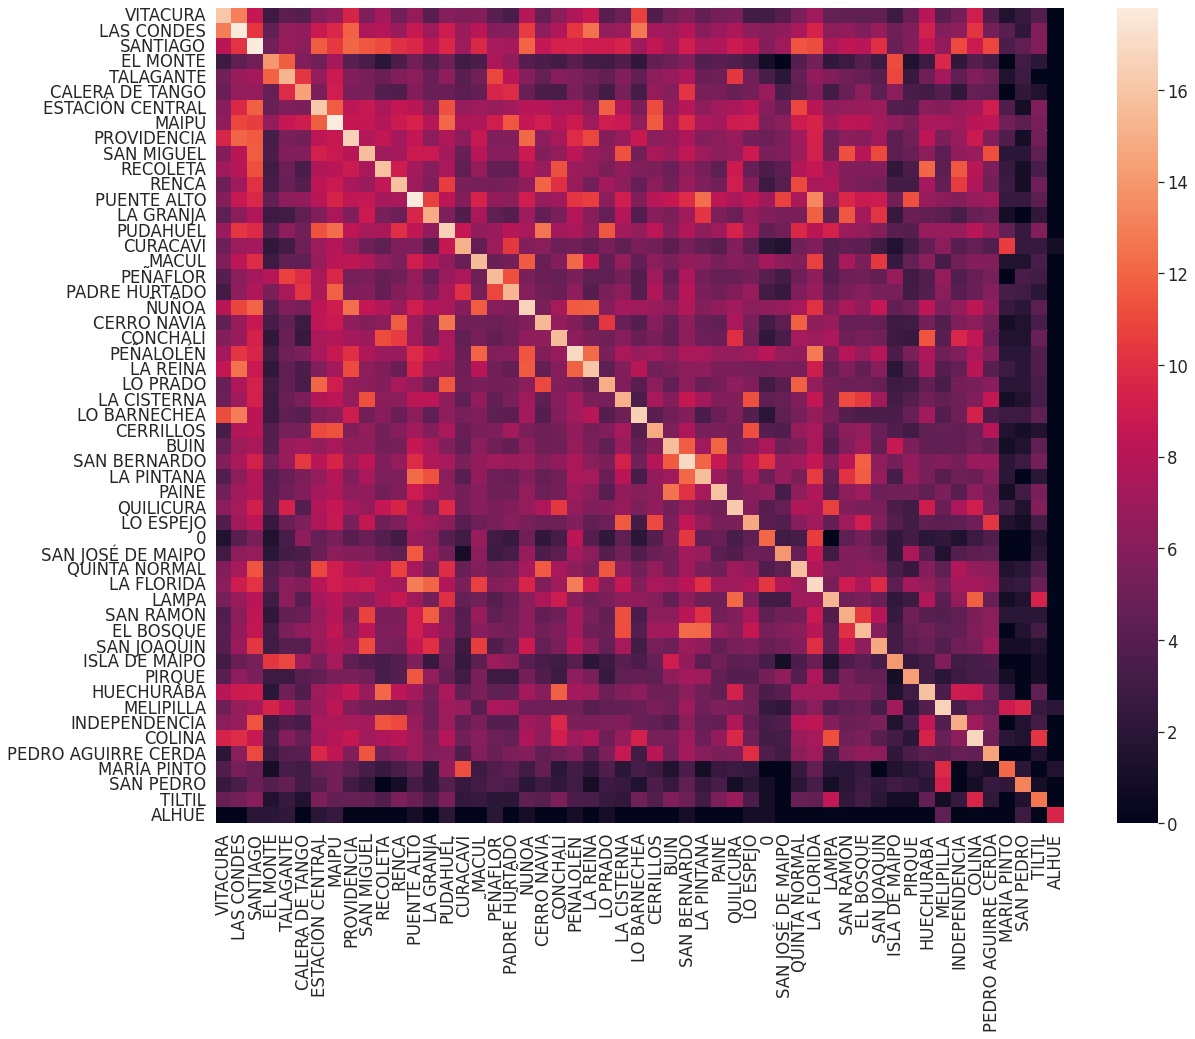

In [ ]:
matrix = matrix.values
matrix = logarithm(matrix)
sns.set(font_scale = 1.5,rc = {'figure.figsize':(19,15)})
sns.heatmap(matrix, 
        xticklabels=matrix.columns,
        yticklabels=matrix.columns)

In [ ]:
matrix

,VITACURA,LAS CONDES,SANTIAGO,EL MONTE,TALAGANTE,CALERA DE TANGO,ESTACIÓN CENTRAL,MAIPÚ,PROVIDENCIA,SAN MIGUEL,...,PIRQUE,HUECHURABA,MELIPILLA,INDEPENDENCIA,COLINA,PEDRO AGUIRRE CERDA,MARÍA PINTO,SAN PEDRO,TILTIL,ALHUÉ
VITACURA,16.108341,13.014892,8.629357,2.807355,4.247928,3.906891,6.022368,6.714246,9.457381,5.643856,...,4.857981,8.129283,4.087463,5.285402,9.152285,3.700440,1.584963,2.584963,3.807355,0.000000
LAS CONDES,12.979425,17.754111,10.355351,4.459432,6.599913,6.523562,8.784635,9.649256,11.932584,7.643856,...,5.727920,9.245553,5.857981,6.392317,10.279611,5.321928,4.087463,2.321928,5.832890,0.000000
SANTIAGO,8.199672,10.214319,17.772759,5.209453,6.781360,6.303781,11.690435,10.481799,12.067770,11.499846,...,5.954196,8.430453,6.523562,11.070121,8.857981,10.957102,3.584963,4.392317,5.781360,0.000000
EL MONTE,2.807355,4.392317,5.087463,14.032046,11.757807,5.727920,5.209453,7.199672,4.087463,3.459432,...,1.584963,2.807355,9.609179,2.321928,3.906891,3.169925,0.000000,3.000000,2.000000,0.000000
TALAGANTE,5.169925,6.754888,7.179909,11.935165,15.224115,10.343186,6.643856,8.829723,5.857981,5.392317,...,2.584963,4.954196,7.285402,4.392317,5.781360,5.129283,1.584963,2.807355,0.000000,0.000000
CALERA DE TANGO,4.857981,6.569856,6.569856,4.700440,9.862637,14.394798,5.554589,9.068778,5.459432,5.614710,...,3.459432,3.169925,4.000000,2.321928,4.643856,4.392317,0.000000,2.321928,1.584963,0.000000
ESTACIÓN CENTRAL,6.108524,9.705632,11.878434,4.754888,5.727920,5.554589,16.149430,11.701740,8.303781,8.734710,...,3.700440,6.149747,5.977280,6.781360,7.209453,9.118941,3.700440,1.000000,5.727920,0.000000
MAIPÚ,6.409391,10.917372,10.580259,6.554589,8.569856,8.994353,11.785861,17.743296,8.654636,8.614710,...,5.584963,7.392317,7.417853,7.000000,8.113742,8.308339,5.209453,4.247928,5.459432,0.000000
PROVIDENCIA,9.588715,11.989040,11.638888,3.321928,5.554589,5.247928,8.285402,8.738092,16.547934,7.794416,...,5.169925,8.252665,5.614710,6.845490,8.839204,5.977280,3.700440,1.000000,5.087463,0.000000
SAN MIGUEL,5.930737,8.124121,11.685187,3.584963,5.882643,5.906891,9.294621,8.774787,8.027906,15.670712,...,4.857981,6.266787,4.247928,6.475733,6.807355,11.259743,2.000000,2.000000,4.392317,0.000000


In [ ]:
!ls #sample.to_csv('sample_1000000.csv')

antenna_geolocation.csv   phone_id_routes_clean.json
antennas_geolocation.csv  phone_id_routes.json
bts_comuna.csv		  phones_initial_dataset.names
dict_coord_bts.pickle	  routes_ready.csv
json			  trips2.csv
out.csv			  trips.csv


In [ ]:
'''
origin = []
destination = []

max_dwell = 20
prev_phone = 0
new_phone = 0
############################ destination ############
for i in range(len(sample['start'])):
  if sample['dwell time'][i] > max_dwell:
    destination.append(sample['comuna'][i])


df['destination'] = destination



for i in range(len(df['destination'])):
  new_phone = sample['phone id'][i]
  if prev_phone != new_phone:
    origin.append(sample['comuna'][i])
  
  else:
    if i < len(df['destination'])-1:
      origin.append(sample['comuna'][i+1])
    else:
      origin.append('End')
  prev_phone = new_phone

df['origin'] = origin
df['dwell time'] = sample['dwell time'] # quitar esta columna, ya que solo es para faciliar visualizacion


df
'''

"\norigin = []\ndestination = []\n\nmax_dwell = 20\nprev_phone = 0\nnew_phone = 0\n############################ destination ############\nfor i in range(len(sample['start'])):\n  if sample['dwell time'][i] > max_dwell:\n    destination.append(sample['comuna'][i])\n\n\ndf['destination'] = destination\n\n\n\nfor i in range(len(df['destination'])):\n  new_phone = sample['phone id'][i]\n  if prev_phone != new_phone:\n    origin.append(sample['comuna'][i])\n  \n  else:\n    if i < len(df['destination'])-1:\n      origin.append(sample['comuna'][i+1])\n    else:\n      origin.append('End')\n  prev_phone = new_phone\n\ndf['origin'] = origin\ndf['dwell time'] = sample['dwell time'] # quitar esta columna, ya que solo es para faciliar visualizacion\n\n\ndf\n"

In [ ]:
mat = [[1,2,3],[4,5,6],[7,8,9]]
mat = logarithm(mat)
mat

TypeError: ignored